In [697]:
import torch
from nsvd import NSVD4, plot_img
from norwai_regression import NSVDModel, haversine
from torchvision import transforms
import random
import folium

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


In [698]:
tf = transforms.Compose([
  transforms.Resize((128, 128)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
])
norm_tf = transforms.Compose([
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

test = NSVD4('./data', 'coords', train=False, transforms=tf, return_coords=False)

tensor([61.7953,  5.9813], device='cuda:0')


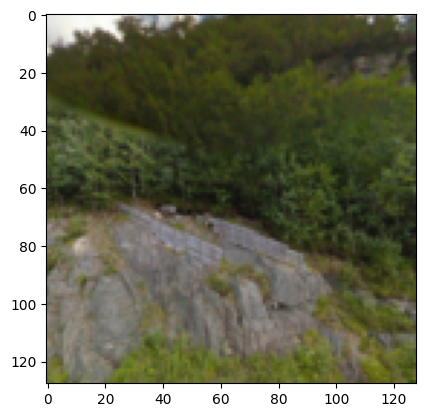

In [699]:
img, coords, _ = test[random.randint(0, len(test)-1)]
#print(img)
img, coords = img.to(device), torch.tensor(coords).to(device).float()
print(coords)
plot_img(img.cpu())
img = norm_tf(img)


In [700]:

model = NSVDModel()
model = torch.load('./data/trained_models/distance/nsvd_128_5')
model.to(device)
model.eval()

with torch.no_grad():
  guess = model(img.unsqueeze(0)).flatten()
  print(guess)

print(coords)
print(guess)


tensor([61.5004,  8.2018], device='cuda:0')
tensor([61.7953,  5.9813], device='cuda:0')
tensor([61.5004,  8.2018], device='cuda:0')


In [701]:
def weed(a,b):
  a = a.unsqueeze(0)
  b = b.unsqueeze(0)
  print(a.shape, b.shape)
  print("distance: {}".format(haversine(a[:, 0], a[:, 1], b[:, 0], b[:, 1])))

weed(guess, coords)

torch.Size([1, 2]) torch.Size([1, 2])
distance: 121.74480438232422


In [702]:

m = folium.Map((64.9701, 13.509217), zoom_start=4)
folium.CircleMarker(location=(coords[0], coords[1]), tooltip='real', radius=1, color='#0080bb', fill_color='#0080bb').add_to(m)
folium.CircleMarker(location=(guess[0], guess[1]), tooltip='guessed', radius=1, color='#d40834', fill_color='#d40834').add_to(m)
folium.PolyLine([(coords[0], coords[1]),(guess[0], guess[1])], color='red').add_to(m)

m
